In [1]:
from Archivos_Apoyo.AngleCouplingAnalyzer import AngleCouplingAnalyzer
ruta_entrenamiento_robot="logs_lift_leg/general_values_20251011_124034.pid18672.csv"
ruta_recompensas="logs_lift_leg/rewards_20251011_124034.pid18672.csv"
anglecouplinganalyzer=AngleCouplingAnalyzer()

In [2]:
df_general=anglecouplinganalyzer.cargar_csv(ruta_entrenamiento_robot)
df_recompensas=anglecouplinganalyzer.cargar_csv(ruta_recompensas)

In [3]:
angulos_joints=anglecouplinganalyzer.split_parameters_df(df_general, startswith="q_")
angular_speed=anglecouplinganalyzer.split_parameters_df(df_general, startswith="vel_")
torque=anglecouplinganalyzer.split_parameters_df(df_general, startswith="τ_reaction_")
forces=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Forces_")
pressures=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Pressure_")
coms=anglecouplinganalyzer.split_parameters_df(df_general, startswith="COM_")
zmps=anglecouplinganalyzer.split_parameters_df(df_general, startswith="ZMP_")
df_angle_speed = df_general.loc[:, df_general.columns.str.startswith(("q_", "vel_"))]
df_angle_com = df_general.loc[:, df_general.columns.str.startswith(("q_left_hip", "q_right_hip", "COM_"))]
df_presiones_velocidades=df_general.loc[:, df_general.columns.str.startswith(("vel_", "Pressure_"))]

In [4]:
df_presiones_velocidades

,vel_left_hip_roll_joint,Pressure_left_hip_roll_jointflexion,Pressure_left_hip_roll_jointextension,vel_left_hip_pitch_joint,Pressure_left_hip_pitch_jointflexion,Pressure_left_hip_pitch_jointextension,vel_left_knee_joint,Pressure_left_knee_jointflexion,Pressure_left_knee_jointextension,vel_left_ankle_joint,...,Pressure_right_hip_roll_jointextension,vel_right_hip_pitch_joint,Pressure_right_hip_pitch_jointflexion,Pressure_right_hip_pitch_jointextension,vel_right_knee_joint,Pressure_right_knee_jointflexion,Pressure_right_knee_jointextension,vel_right_ankle_joint,Pressure_right_ankle_jointflexion,Pressure_right_ankle_jointextension
0,-0.564,0.0,0.355177,-2.310,0.000000,0.223811,1.168,0.138138,0.127099,0.351,...,0.047635,1.809,0.008083,0.190922,-0.000,0.321743,0.000000,0.484,0.487984,0.000000
1,-0.833,0.0,0.359207,-0.565,0.000000,0.235263,0.663,0.124030,0.118534,0.145,...,0.062634,0.355,0.000000,0.211905,0.124,0.285354,0.000000,0.688,0.481791,0.000000
2,-1.473,0.0,0.300860,0.349,0.000000,0.218637,0.969,0.111787,0.128810,1.104,...,0.130469,-0.897,0.000000,0.218208,0.000,0.187571,0.000000,0.997,0.459744,0.000000
3,0.038,0.0,0.000000,5.961,0.000000,0.178573,-6.825,0.000000,0.066100,-0.381,...,0.297398,-2.890,0.000000,0.032158,0.000,0.000000,0.207398,-0.000,0.148333,0.000000
4,0.002,0.0,0.000000,2.699,0.000000,0.176451,-1.065,0.026293,0.000000,-0.000,...,0.311286,-1.966,0.000000,0.010655,1.552,0.000000,0.204991,-0.000,0.064784,0.016733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,-0.052,0.0,0.000000,-1.818,0.068393,0.639349,0.628,0.000000,1.000000,-0.823,...,1.000000,1.493,0.000000,1.000000,0.000,0.000000,0.000000,2.773,1.000000,0.000000
16646,0.060,1.0,0.000000,2.431,0.348278,0.000000,0.014,1.000000,0.000000,2.383,...,1.000000,-2.433,0.000000,0.000000,0.002,1.000000,0.000000,-6.269,0.000000,1.000000
16647,0.086,0.0,0.817350,1.777,0.000000,0.000000,0.047,0.000000,0.000000,-0.592,...,1.000000,-1.821,0.000000,0.762864,0.004,0.000000,0.000000,-5.640,0.000000,1.000000
16648,-0.143,0.0,0.105982,-1.952,0.000000,0.575497,0.001,0.000000,0.849441,0.138,...,1.000000,1.902,0.000000,1.000000,0.016,0.000000,0.000000,6.428,1.000000,0.000000


In [5]:
corr_angulos = anglecouplinganalyzer.correlacion_entre_params(angulos_joints)
corr_angular_speed = anglecouplinganalyzer.correlacion_entre_params(angular_speed)
corr_torque = anglecouplinganalyzer.correlacion_entre_params(torque)
corr_forces = anglecouplinganalyzer.correlacion_entre_params(forces)
corr_presiones=anglecouplinganalyzer.correlacion_entre_params(pressures)
corr_recompensas=anglecouplinganalyzer.correlacion_entre_params(df_recompensas.iloc[:,3:])
corr_coms=anglecouplinganalyzer.correlacion_entre_params(coms)
corr_zmp=anglecouplinganalyzer.correlacion_entre_params(zmps)

In [6]:
corr_angulo_velocidad=anglecouplinganalyzer.correlacion_entre_params(df_angle_speed)
corr_velocidad_presiones=anglecouplinganalyzer.correlacion_entre_params(df_presiones_velocidades)
corr_com_angulo=anglecouplinganalyzer.correlacion_entre_params(df_angle_com)

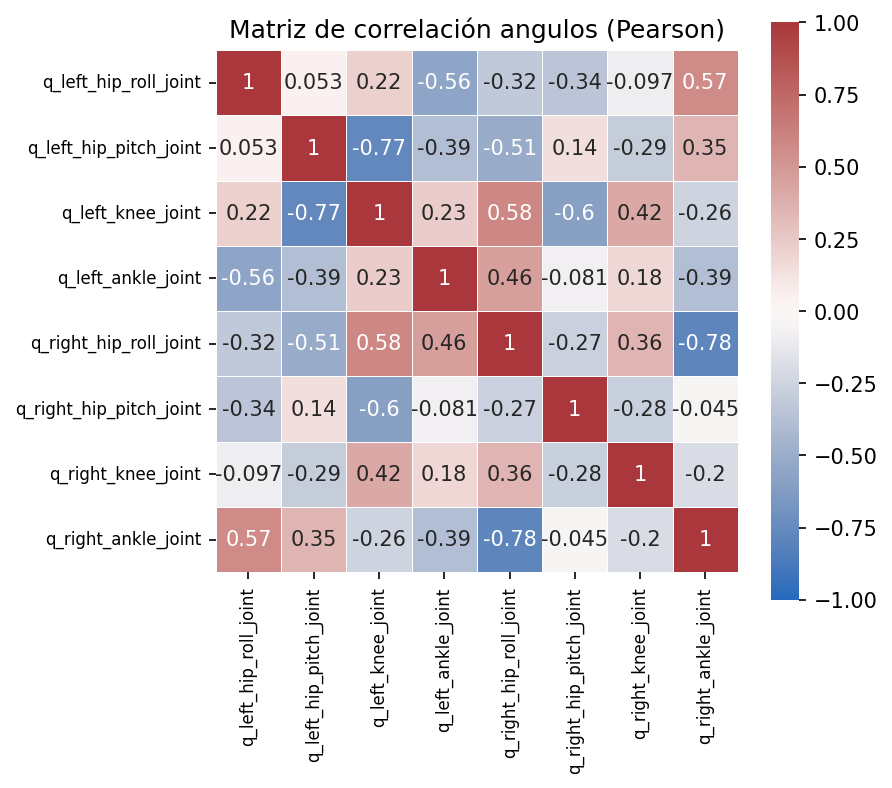

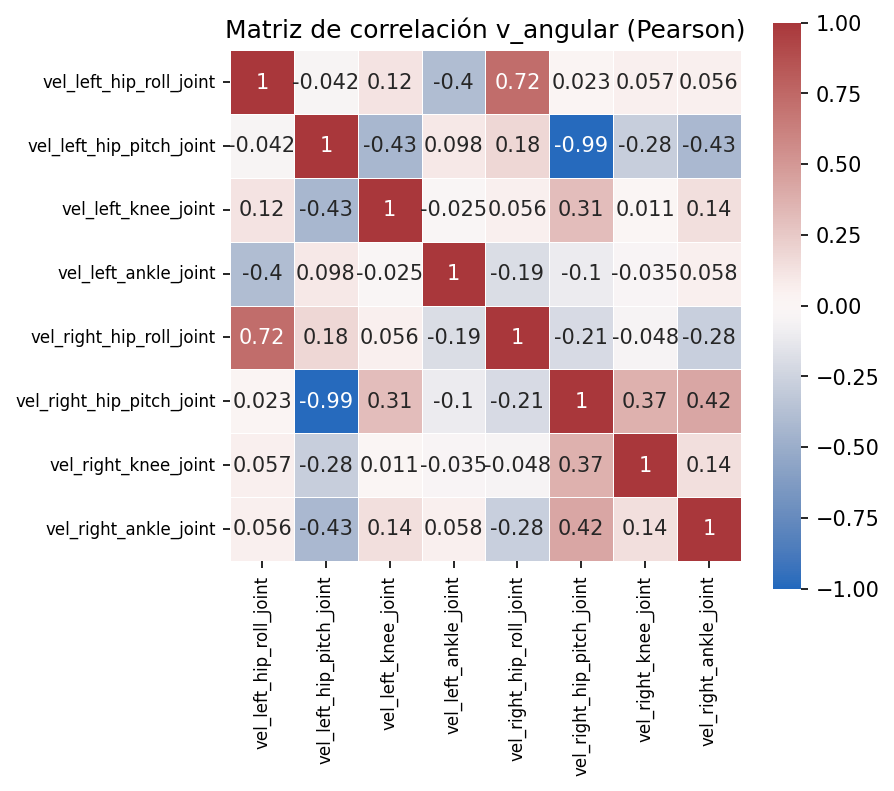

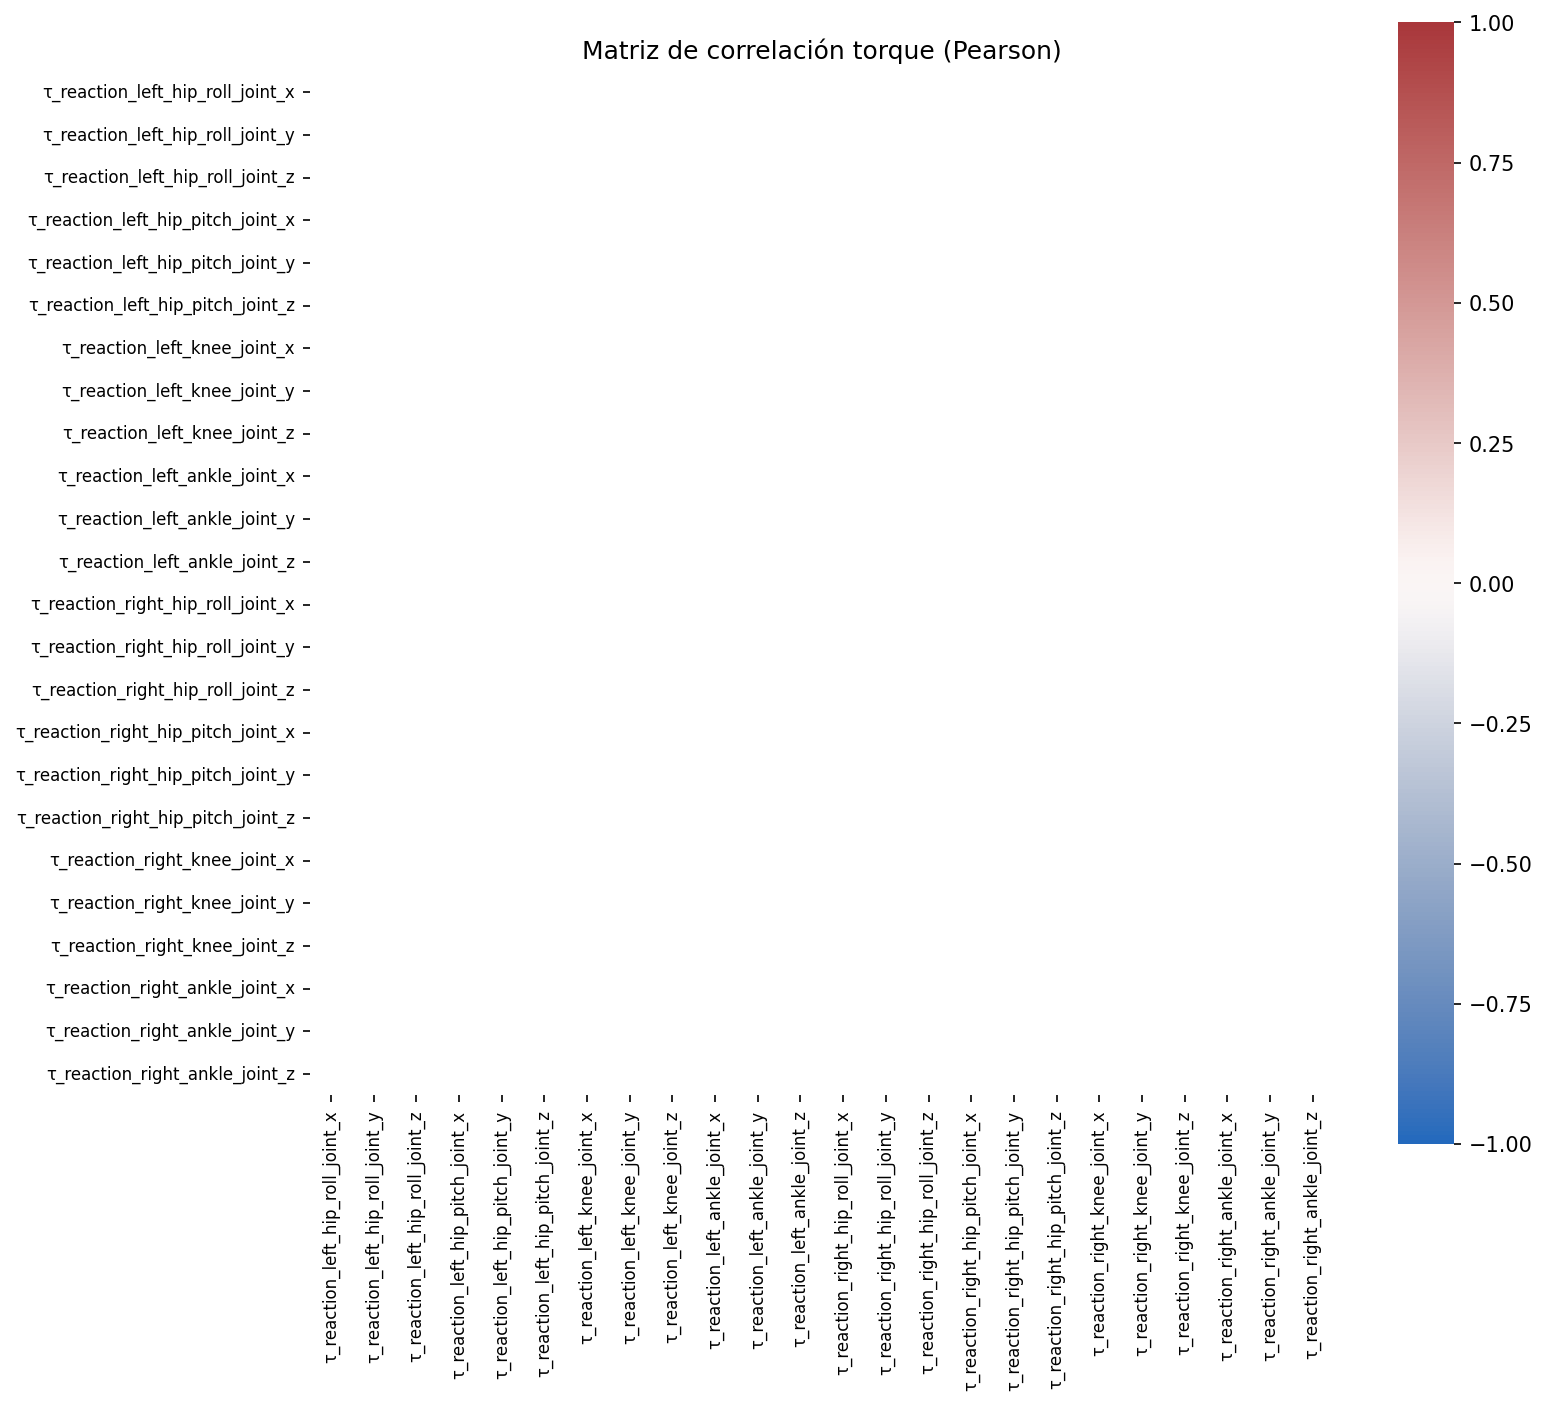

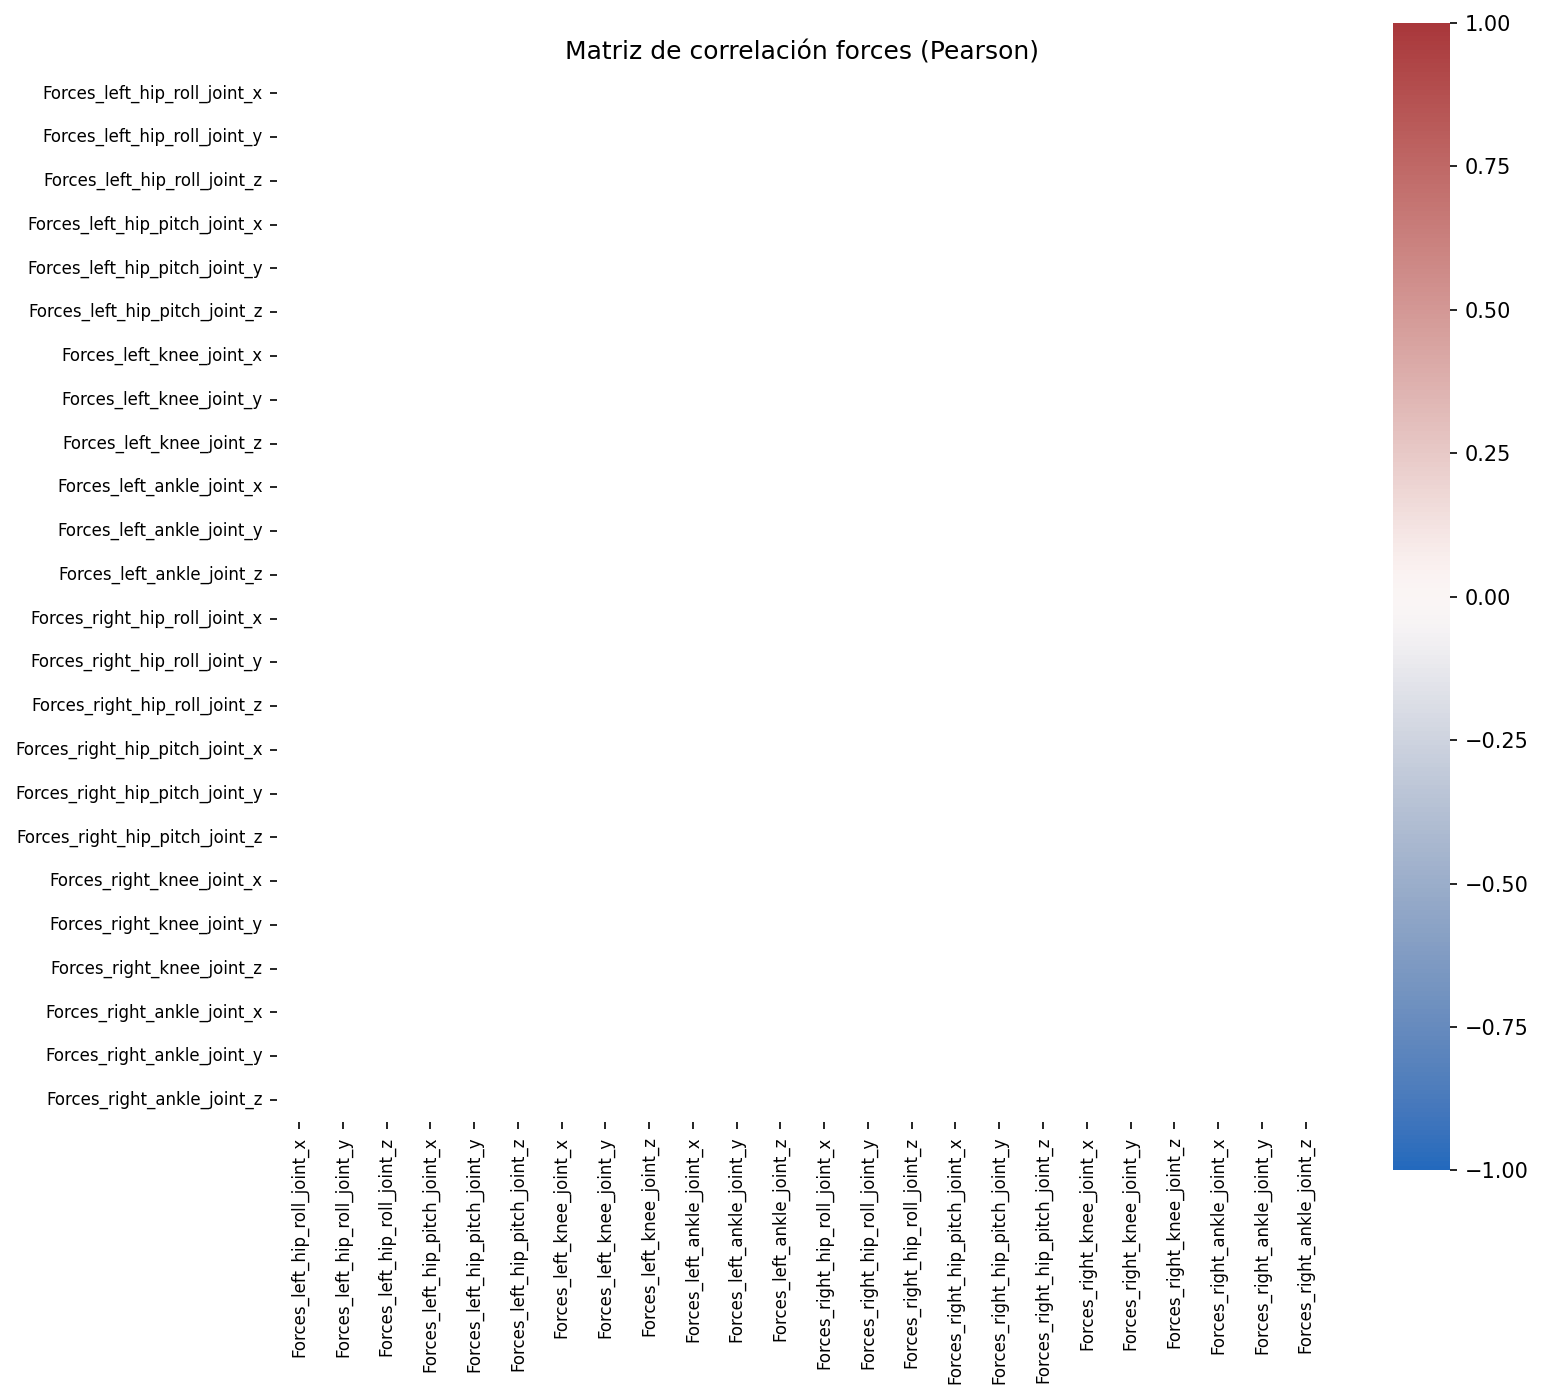

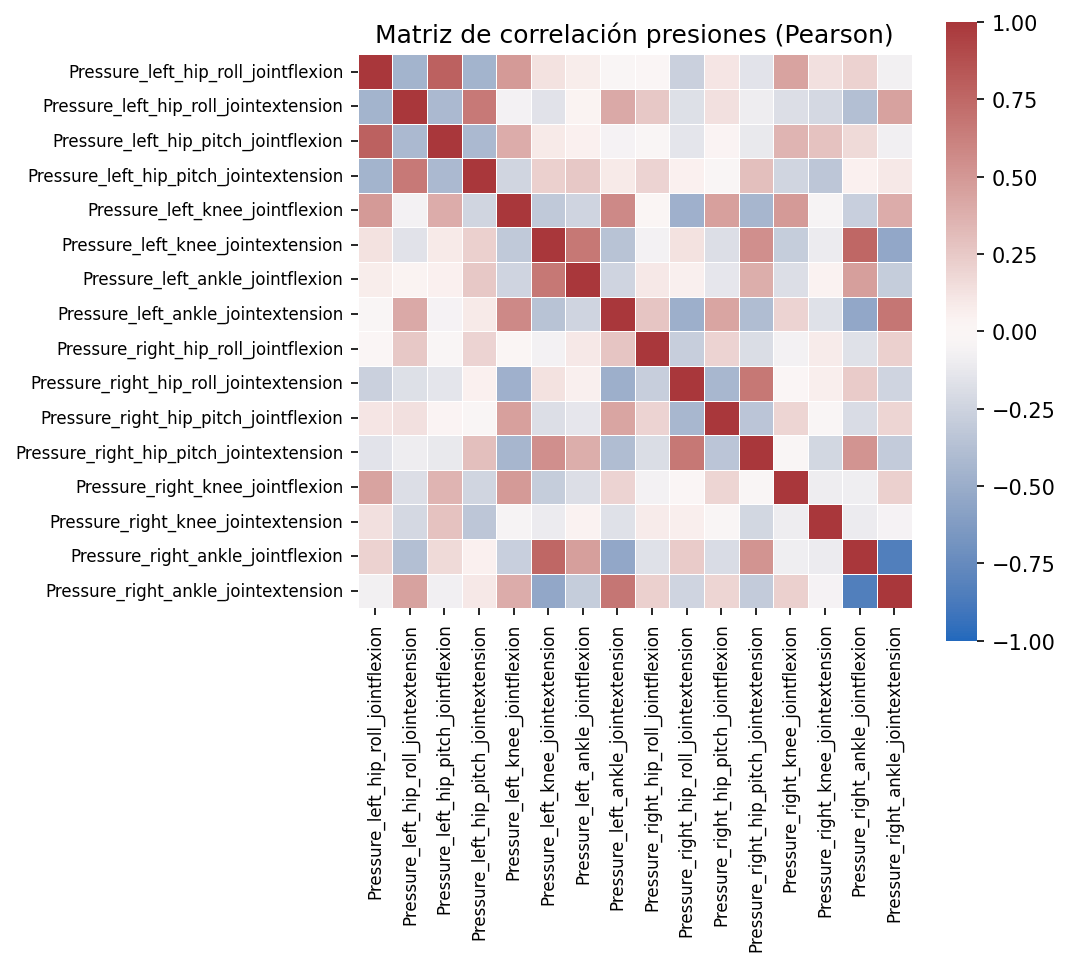

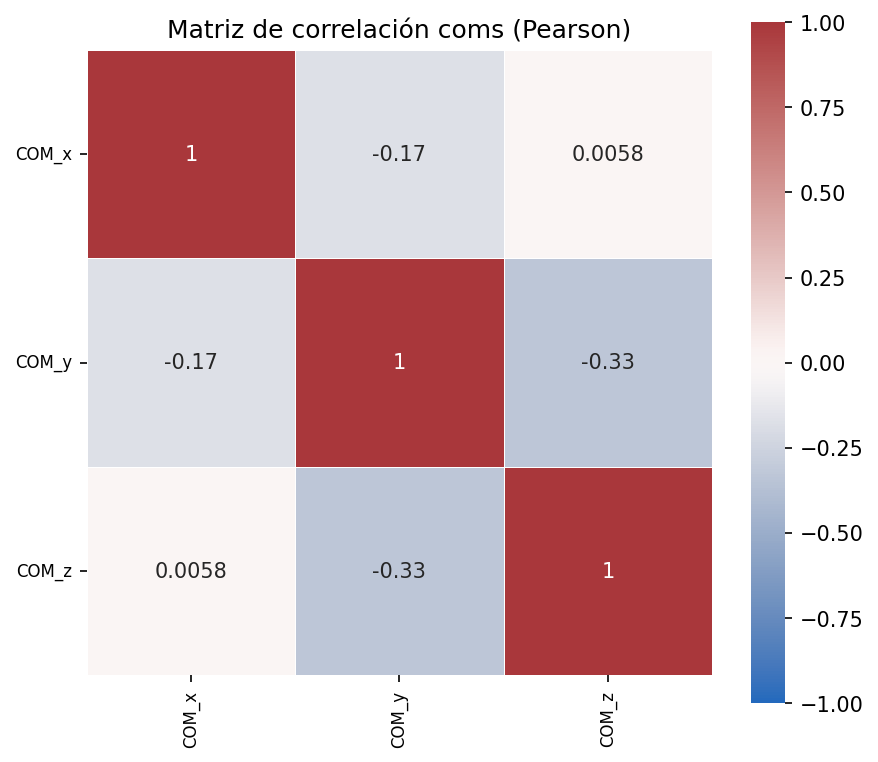

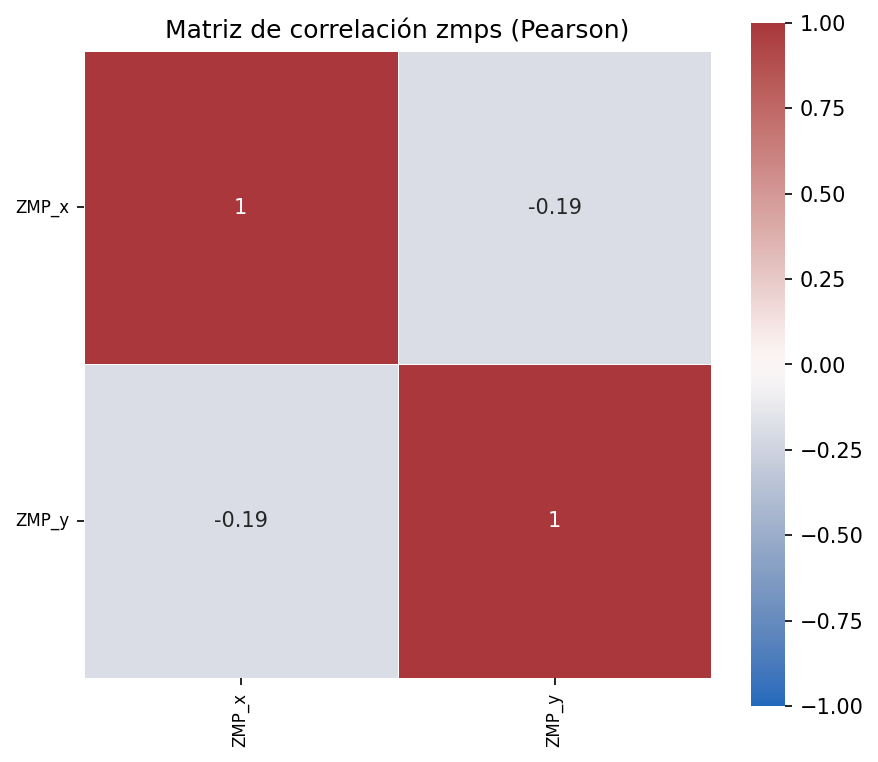

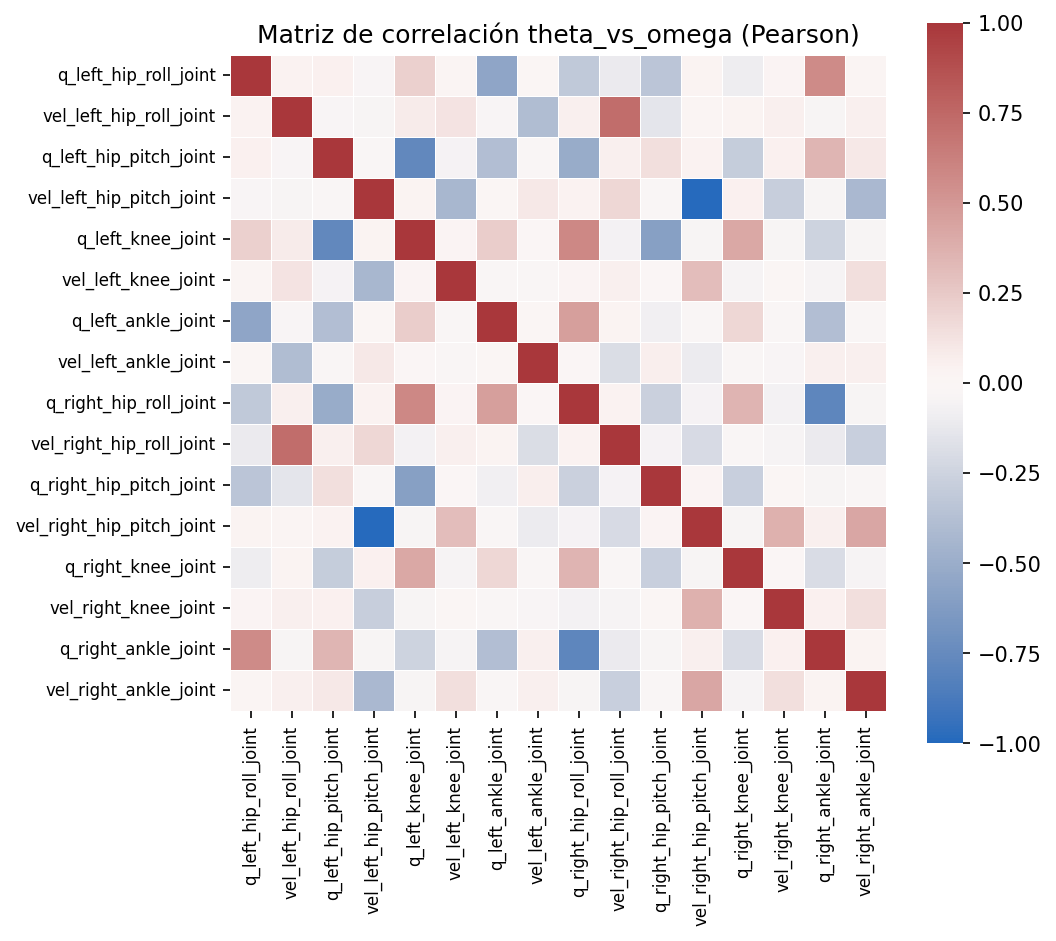

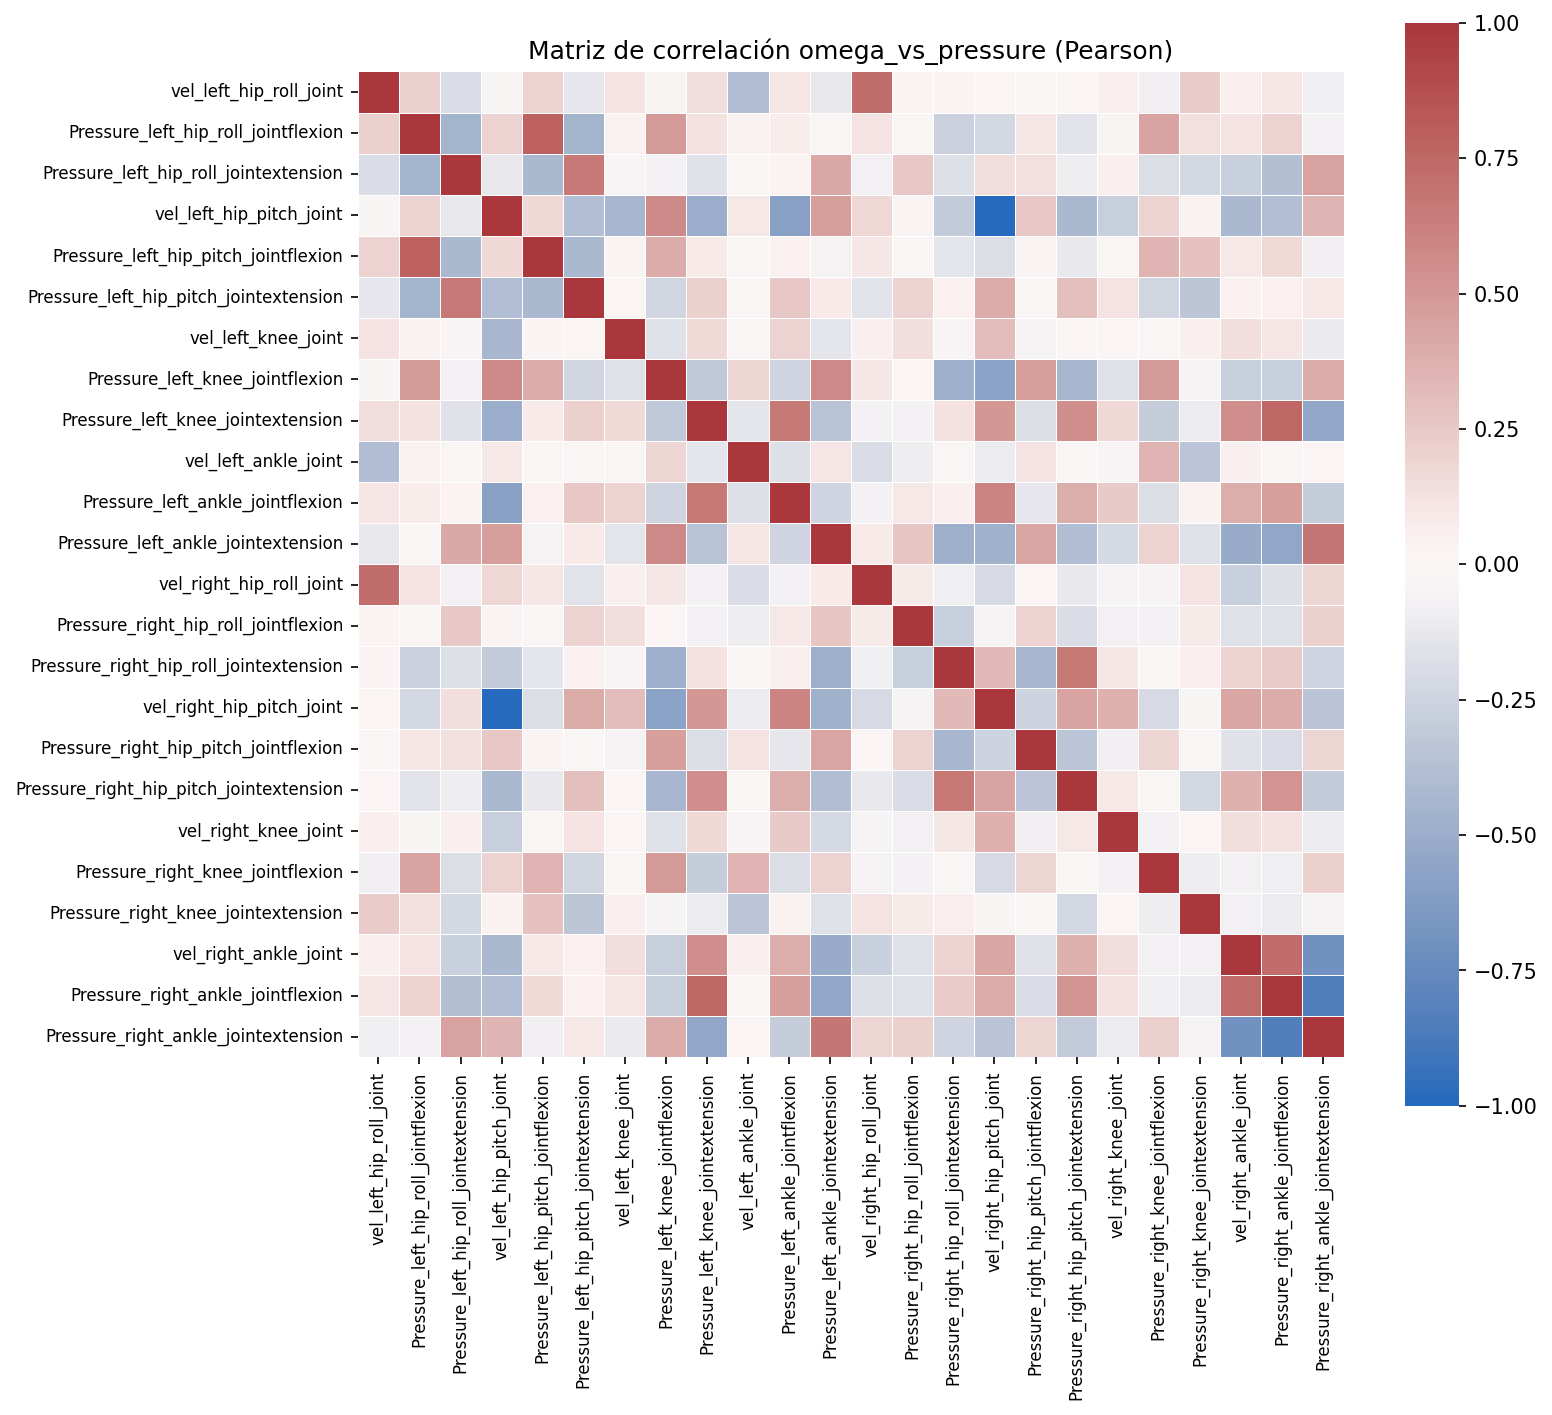

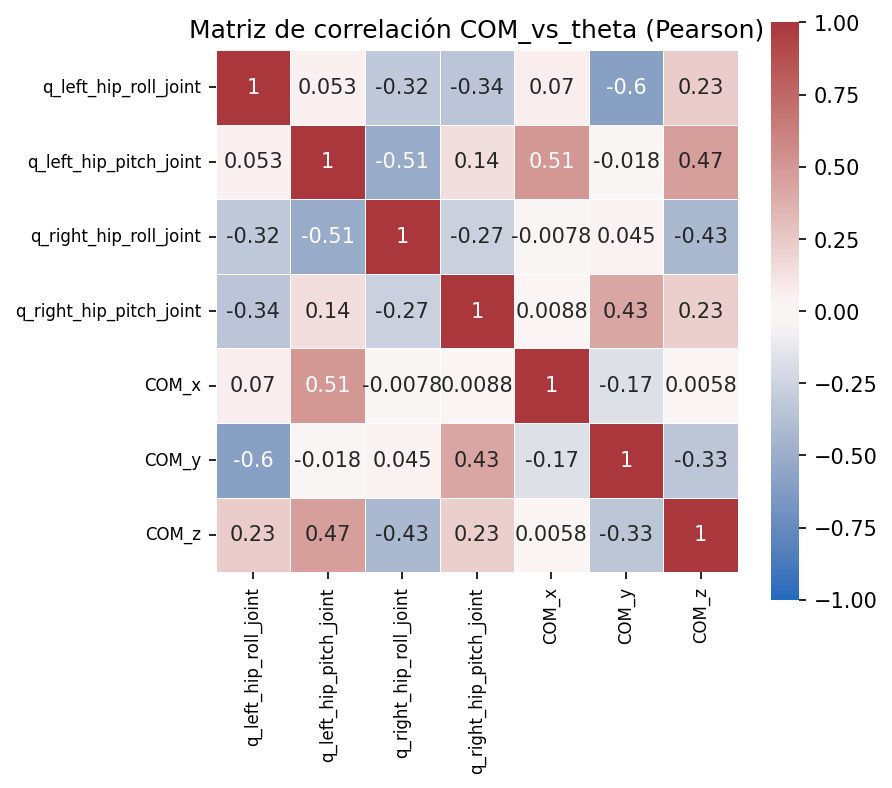

In [7]:
anglecouplinganalyzer.creacion_correlaciones(corr_angulos,"angulos")
anglecouplinganalyzer.creacion_correlaciones(corr_angular_speed, "v_angular")
anglecouplinganalyzer.creacion_correlaciones(corr_torque,"torque", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_forces, "forces", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_presiones, "presiones", annot=False)
#anglecouplinganalyzer.creacion_correlaciones(corr_recompensas, "recompensas", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_coms, "coms")
anglecouplinganalyzer.creacion_correlaciones(corr_zmp, "zmps")
anglecouplinganalyzer.creacion_correlaciones(corr_angulo_velocidad, "theta_vs_omega", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_velocidad_presiones, "omega_vs_pressure", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_com_angulo, "COM_vs_theta")